In [6]:
import json
import os
import pandas as pd

In [2]:
testlist=[17, 31, 88, 125, 128, 131, 147, 150, 183, 184, 185, 186, 187, 188, 190, 192, 193, 195, 196, 197, 198, 199, 211, 212, 213, 215, 216, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 233, 234, 235, 236, 237, 239, 240, 241, 242, 254, 300, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 422, 423, 424, 425, 426, 427, 429, 430, 431, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 448, 449, 450, 451, 452, 453, 454, 455, 466, 478, 486, 492, 533, 535, 536, 547, 564, 638, 663, 664, 665, 666, 667, 669, 674, 676, 677, 678, 680, 681, 682, 684, 686, 687, 688, 689, 690, 692, 693, 694, 695, 696, 697, 699, 709, 719, 728, 729, 736, 738, 740, 761, 763, 775, 776, 841, 851, 860, 863, 867, 872, 930, 931, 935, 936, 942, 946, 951, 966, 967, 971, 972, 974, 976, 977, 990, 998, 1029, 1040, 1042, 1082, 1083, 1088, 1110, 1114, 1123, 1131, 1132, 1133, 1134, 1135, 1136, 1138, 1139, 1141, 1142, 1143, 1144, 1145, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1163, 1164, 1166, 1167, 1168, 1175, 1176, 1177, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1197, 1198, 1199, 1200, 1201, 1202, 1211, 1212, 1213, 1214, 1215, 1216, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1227, 1228, 1229, 1230, 1244, 1245, 1268, 1288, 1301, 1318, 1330, 1345, 1418, 1424, 1425, 1427, 1430, 1433, 1435, 1437, 1442, 1447, 1448, 1451, 1468, 1489, 1493, 1503, 1504, 1505, 1507, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1586, 1681, 1686, 1697, 1784, 1790, 1806, 1866, 1874, 1926, 1954, 1968, 1973, 1994, 1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2027, 2034, 2042, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2054, 2055, 2056, 2057, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2067, 2068, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2093, 2094, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2119, 2132, 2133, 2136, 2142, 2143, 2148, 2163, 2165, 2166, 2167, 2189, 2193, 2202, 2205, 2214, 2218, 2219, 2231, 2238, 2262, 2264, 2266, 2269, 2271, 2298, 2308, 2309, 2310, 2311, 2316, 2317, 2320, 2322, 2326, 2342, 2348, 2352, 2358, 2366, 2375, 2384, 2392, 2397, 2398, 2400, 2401, 2406, 2433, 2449, 2458, 2477, 2647, 2648, 2650, 2658, 2661, 2662, 2689, 2695, 2701, 2714, 2715, 2716, 2718, 2719, 2720, 2722, 2723, 2724, 2725, 2727, 2728, 2730, 2731, 2732, 2733, 2734, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2746, 2747, 2748, 2749, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2766, 2767, 2768, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2793, 2794, 2795, 2796, 2798, 2799, 2800, 2802, 2803, 2804, 2806, 2807, 2808, 2809, 2811, 2816, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2845, 2861, 2873, 2875, 2895, 2897, 2903, 2914, 2917, 2920, 2950, 2951, 2991, 3001, 3011, 3013, 3022, 3023, 3024, 3032, 3044, 3062, 3089, 3097, 3099, 3108, 3116, 3119, 3120, 3121, 3122, 3129, 3142, 3151, 3152, 3153, 3155, 3156, 3163, 3174, 3181, 3186, 3188, 3190, 3222, 3235, 3240, 3243, 3250, 3257, 3261, 3269, 3282, 3285, 3302, 3304, 3308, 3322, 3354, 3355, 3361, 3396, 3429, 3501, 3552, 3635, 3673, 3711]
len(testlist)

640

In [3]:
models=[
        "claude_sonnet","claude_sonnet_rag",
        "gpt_o1","gpt_o1_rag",
        "Gemini_Pro1","Gemini_Pro1_rag",
        "deepseek","deepseek_rag",
        "llama","llama_rag",
        "qwen","qwen_rag",

        "gpt_4o","gpt_4o_rag",
        "gemini_1.5_pro","gemini_1.5_pro_rag",
        "claude_3.5","claude_3.5_rag",
        "qwen2_vl","qwen2_vl_rag",
        "Llava","Llava_rag",
        "Llama_3.2_vision","Llama_3.2_vision_rag",
        
        ]

In [4]:
def file_path (model):
    filePath=f"/Users/sden118/Desktop/FinReasoning/output/{model}_output.json"
    return filePath
def file_path_out (model):
    filePathout=f"/Users/sden118/Desktop/FinReasoning/test/{model}_test.json"
    return filePathout

def write_output(data, file_path):
    # Convert DataFrame to list of dictionaries
    data_list = data.to_dict(orient='records')

    # If the file exists, delete it
    if os.path.exists(file_path):
        os.remove(file_path)

    # Write the data to the JSON file
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(data_list, f, ensure_ascii=False, indent=4)
# def write_output(data, file_path):
#     # Convert DataFrame to list of dictionaries
#     data_list = data.to_dict(orient='records')

#     # If the file exists, read the existing data
#     if os.path.exists(file_path):
#         with open(file_path, 'r', encoding='utf-8') as f:
#             existing_data = json.load(f)
#     else:
#         existing_data = []

#     # Merge new data into existing data
#     if isinstance(existing_data, list):
#         existing_data.extend(data_list)
#     else:
#         existing_data = data_list

#     # Write the merged data back to the JSON file
#     with open(file_path, 'w', encoding='utf-8') as f:
#         json.dump(existing_data, f, ensure_ascii=False, indent=4)

In [7]:
# Load the JSON file into a Python dictionary
with open("/Users/sden118/Desktop/FinReasoning/dataset/data_v5.json", 'r', encoding='utf-8') as f:
    data = json.load(f)
for i in range(0, len(data)):
    if data[i]["ID"] in testlist:
        data[i]["Datasplit"] = "test"
    else:
        data[i]["Datasplit"] = "train"
data6=pd.DataFrame(data)
data6=data6[['ID', 'Share Context', 'Share Image','Question Text', 'Image', 'Options', 'Answer', 'Explanation', 'QA Type', 'Level of Difficulty','shared_description', 'description', 'Datasplit']]
data6['Index'] = data6.index
for index, entry in data6.iterrows():
    if (entry["Share Context"] != "") and (entry["Share Image"] == ""):
        a = "images/image_add/" + str(entry["ID"]) + ".png"
        data6.at[index, "Share Image"] = [a]
    if (entry["Share Context"] == "") and (entry["Image"] == ""):
        data6.at[index, "Image"] = "images/image_add/" + str(entry["ID"]) + ".png"

data6.to_csv("/Users/sden118/Desktop/FinReasoning/dataset/data_v6.csv", index=False)
write_output(data6, "/Users/sden118/Desktop/FinReasoning/dataset/data_v6.json")

0


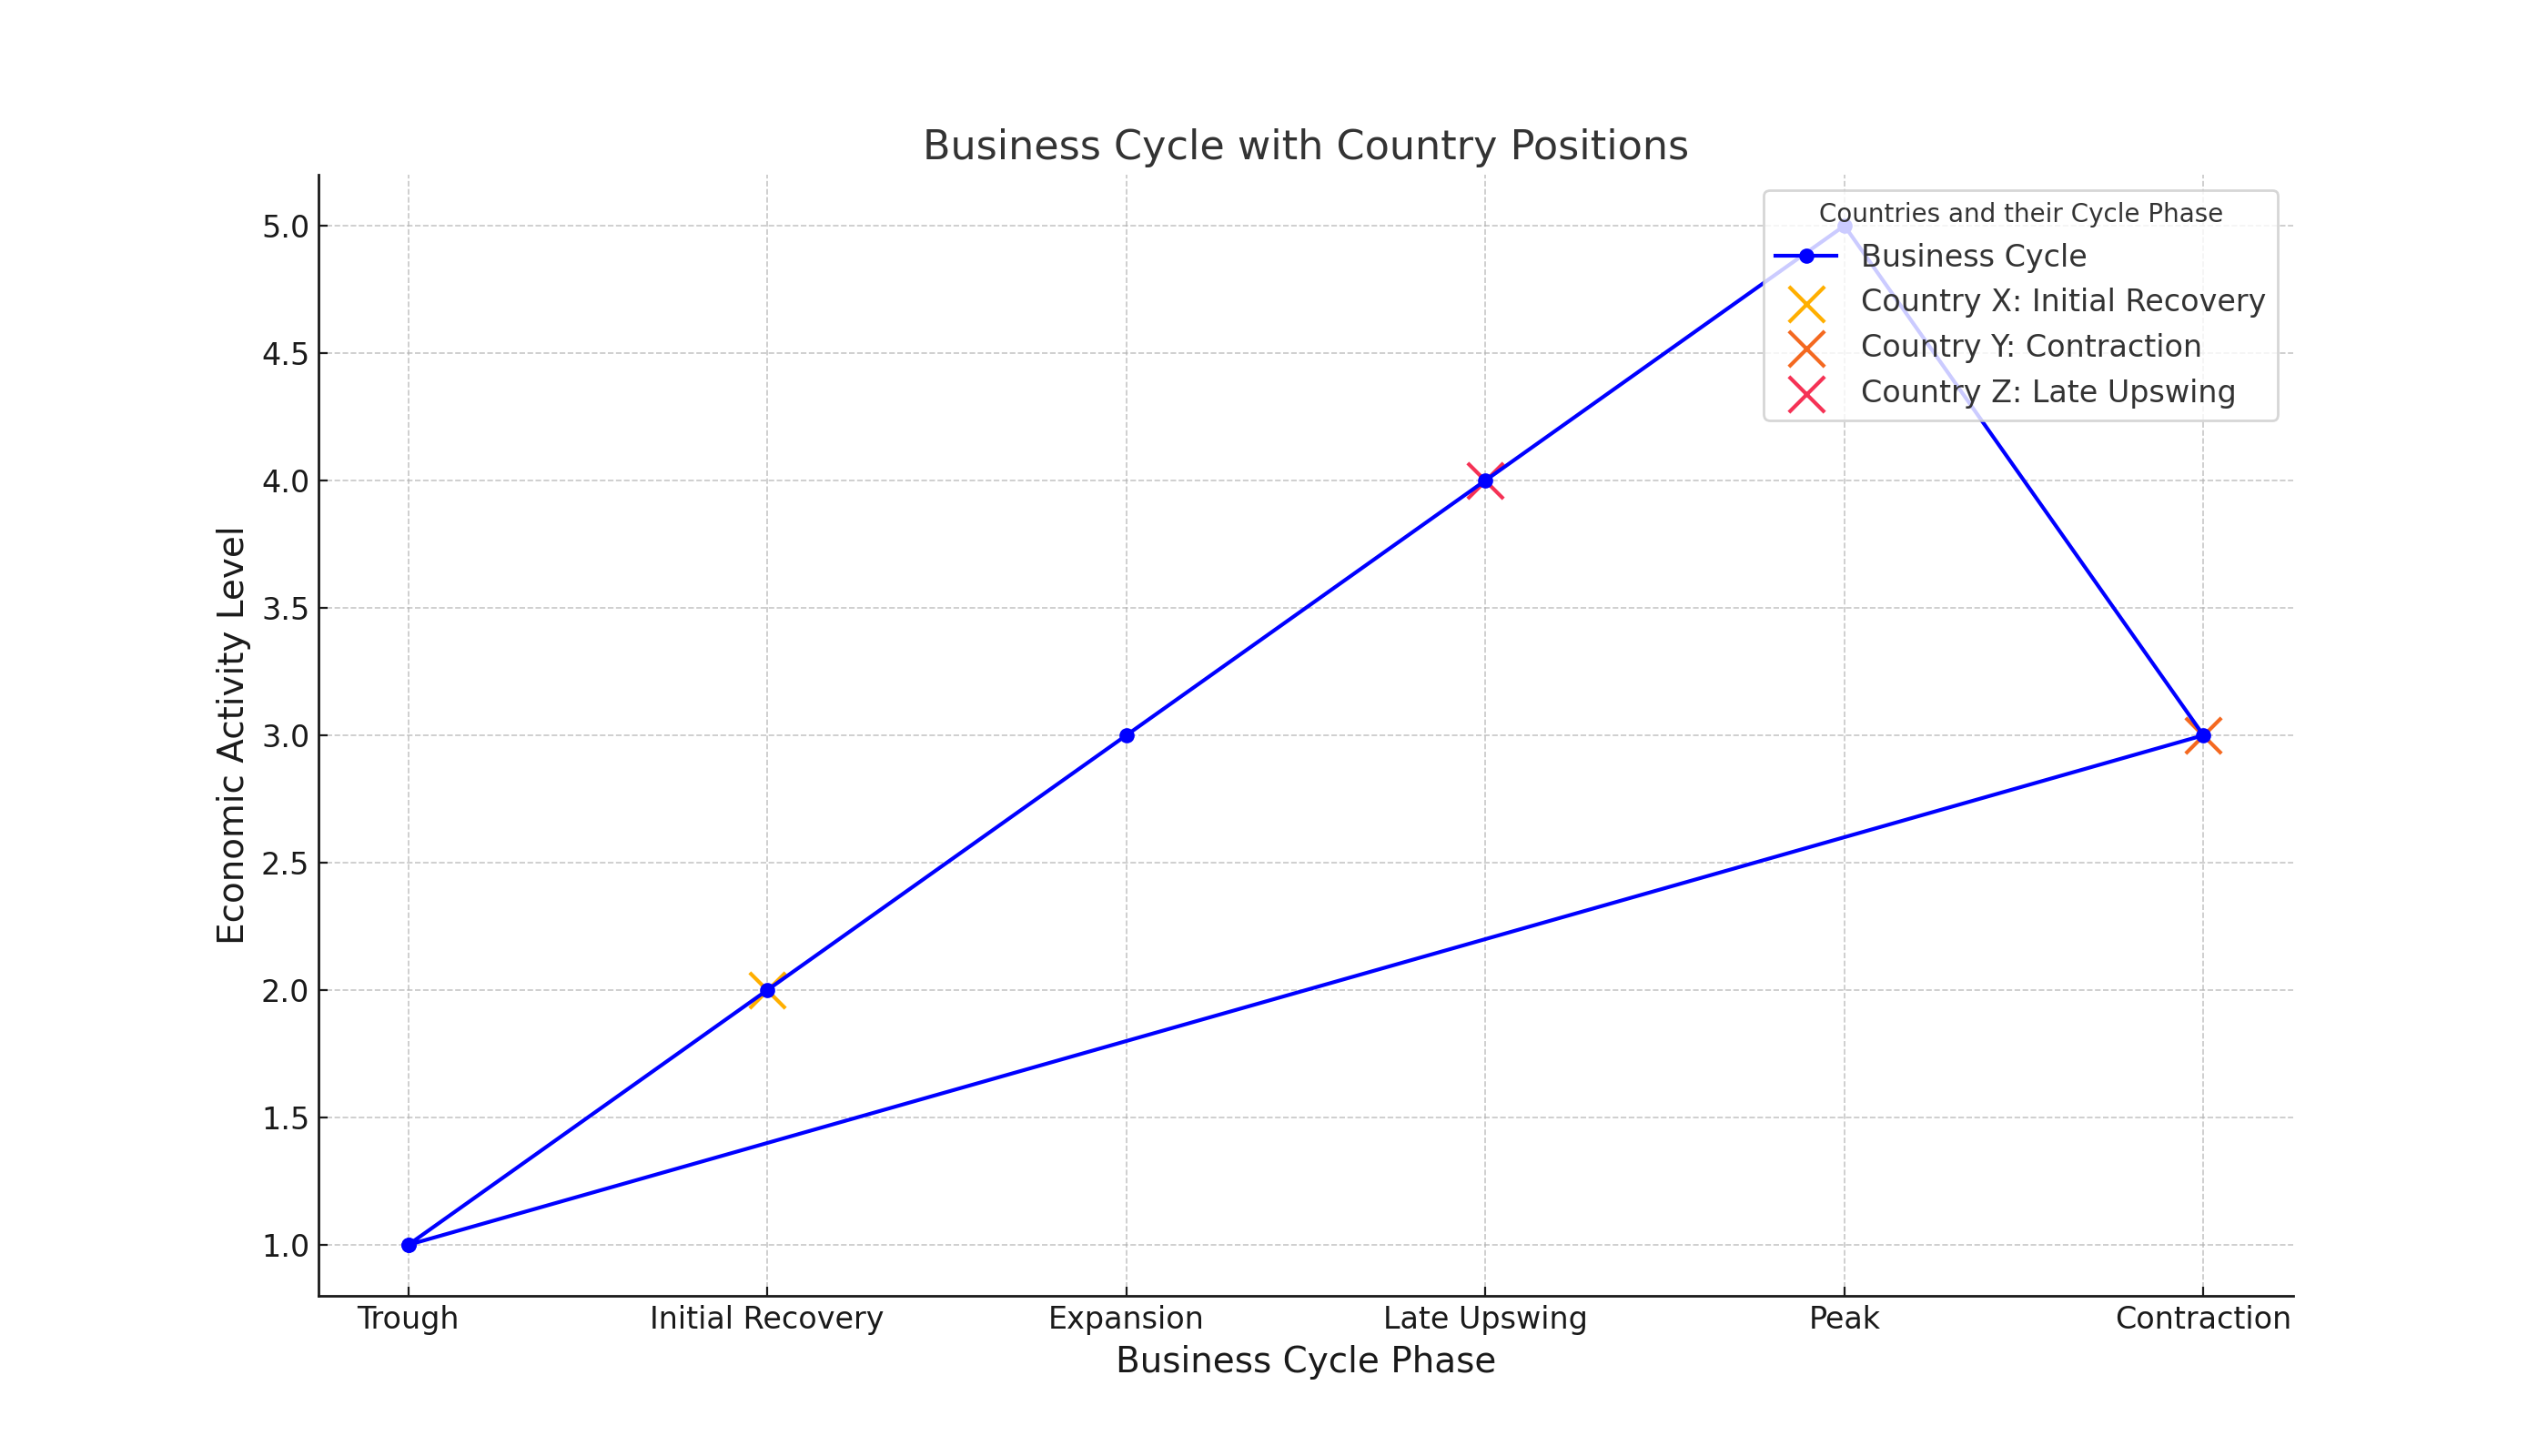

IsADirectoryError: [Errno 21] Is a directory: '/Users/sden118/Desktop/FinReasoning/dataset'

In [ ]:
from PIL import Image 
for entry in data6.iterrows():
    print(entry[1]["ID"])
    if (entry[1]["Share Image"] != ""):
        for i in range(0, len(entry[1]["Share Image"])):
            display(Image.open(entry[1]["Share Image"][i]))
    if entry[1]["Image"] != "":
        display(Image.open(entry[1]["Image"]))
    print("**"*50)


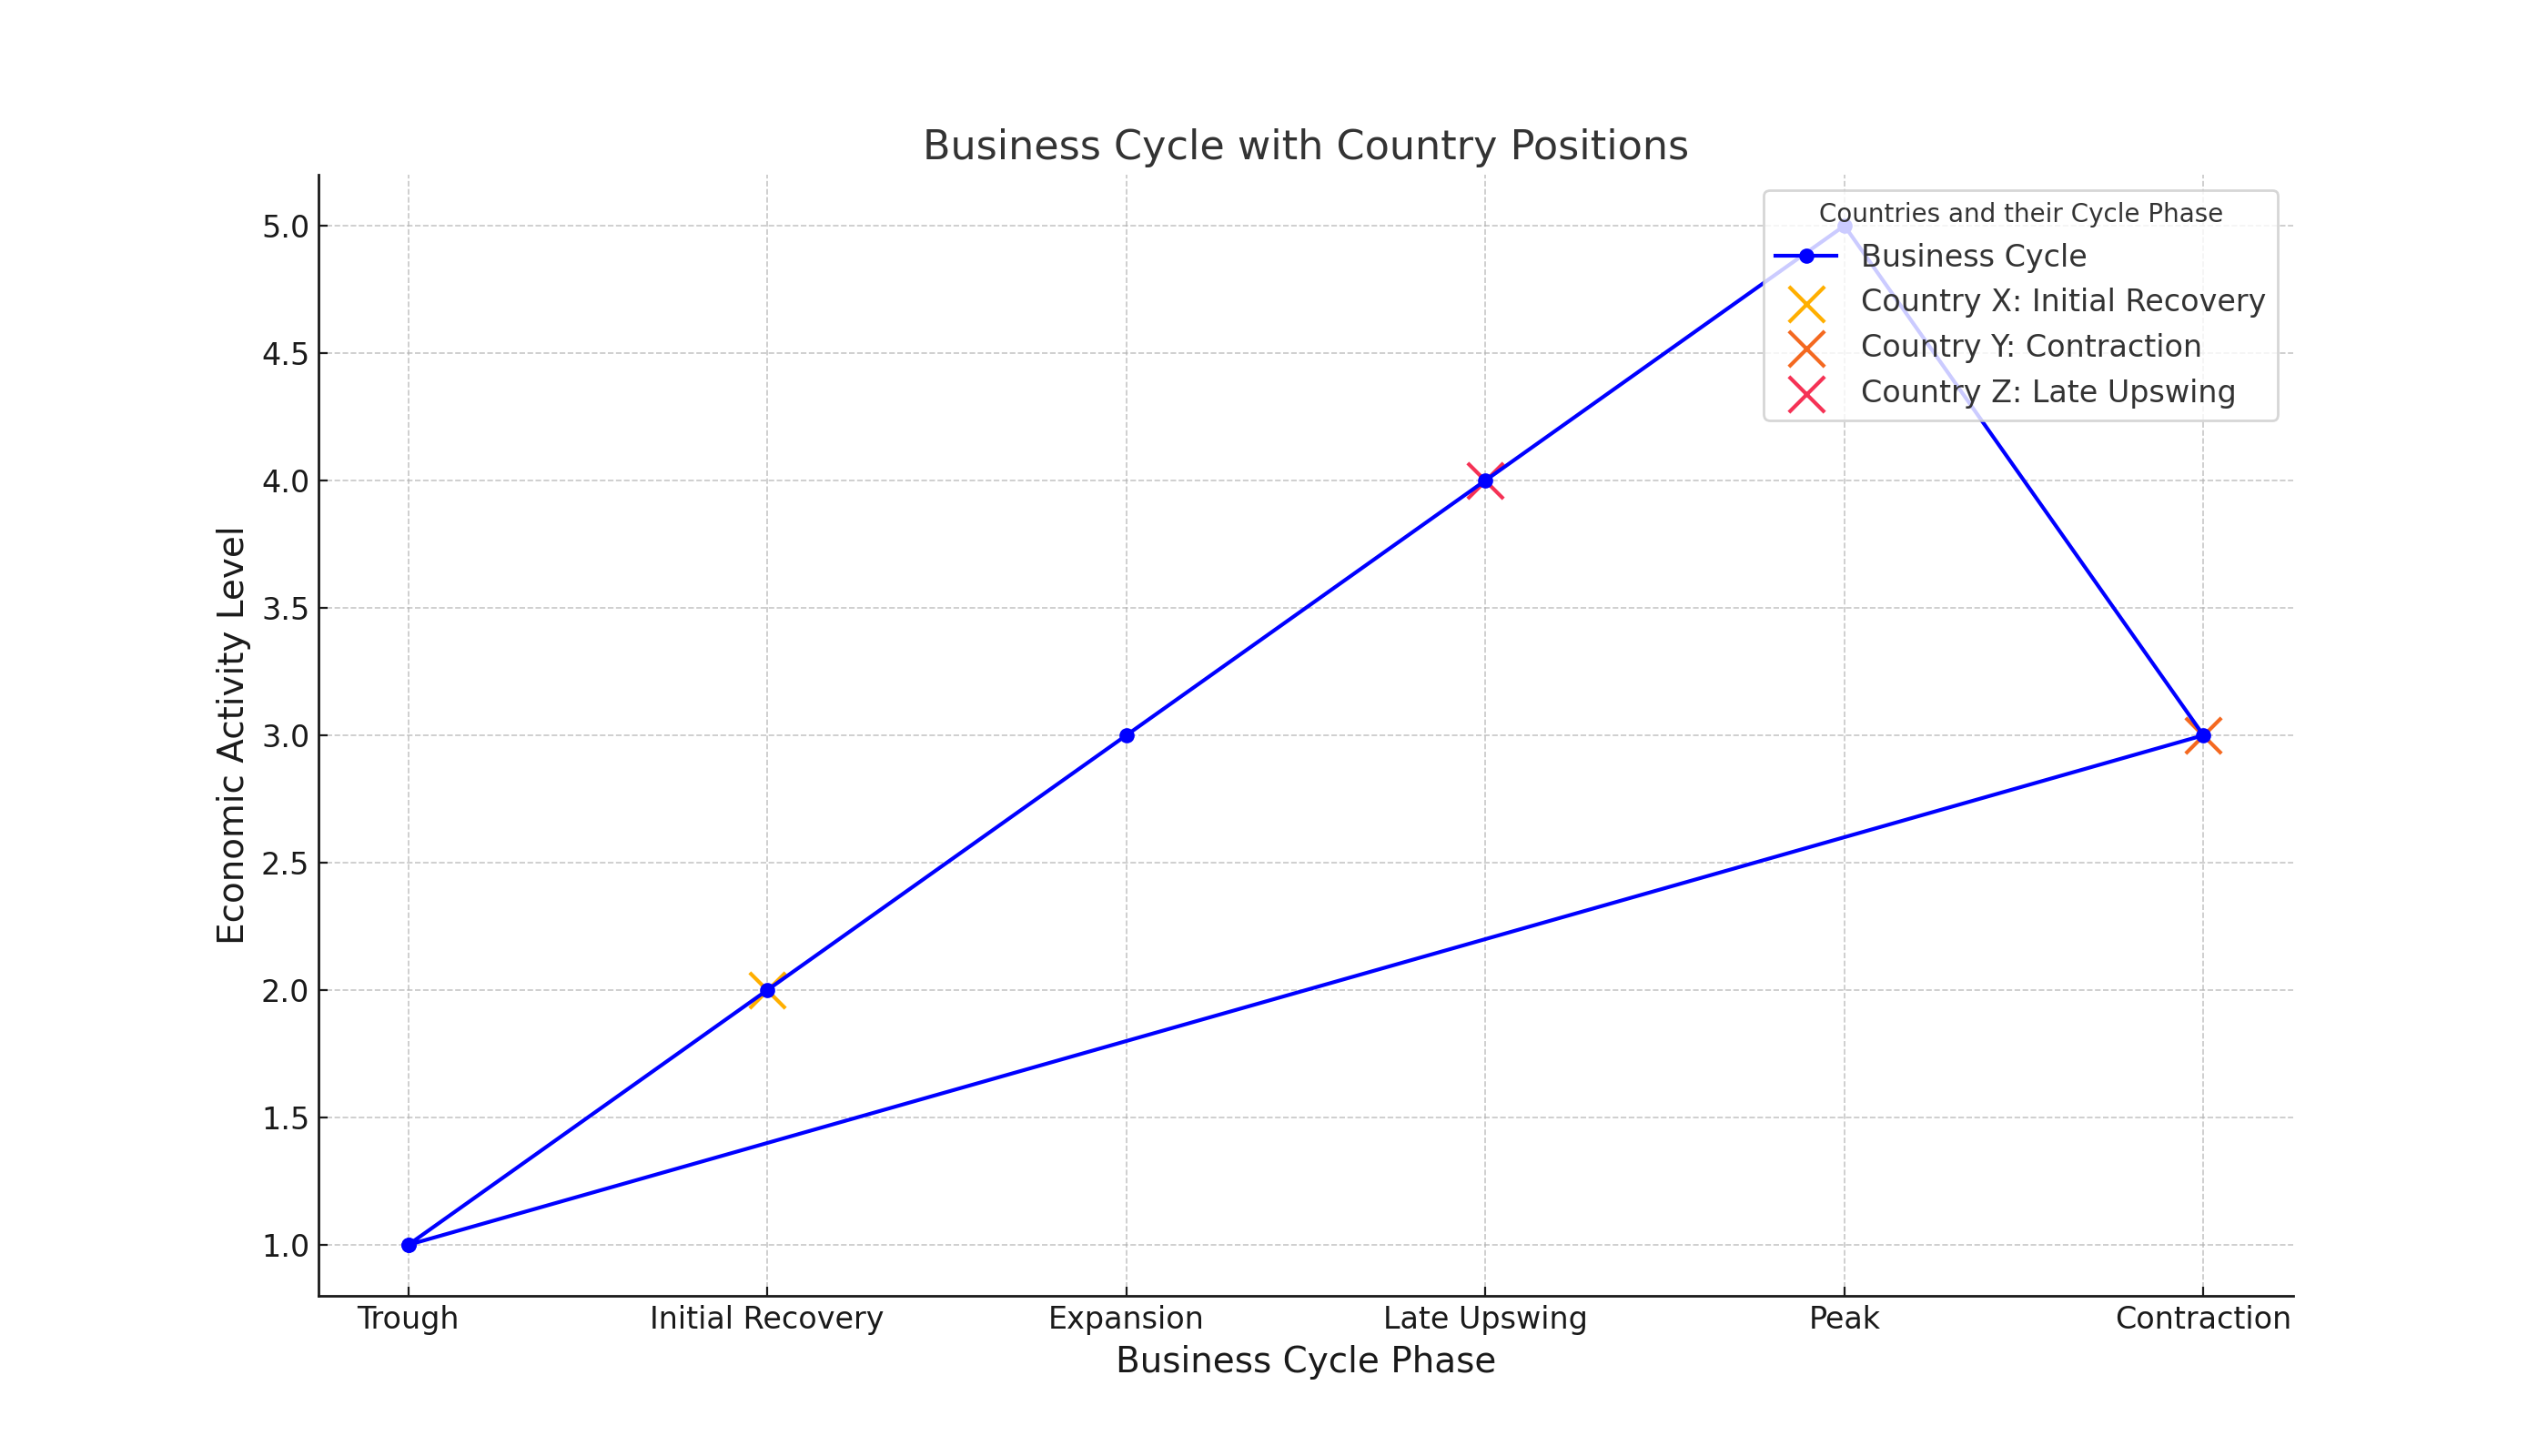

In [27]:
display(Image.open("/Users/sden118/Desktop/FinReasoning/dataset/images/CapitalMarketExpectations_images/share1-8_1.png"))